# IKEA products analysis

**Table of contents**    
- 1. Libraries    
- 2. Reading the data    
- 3. Exploring the data    
  - 3.1. Number of NaN values    
  - 3.2. Number of unique values for each column classified as object    
  - 3.3. Calculating mean, median and standard deviation for price    
  - 3.4. Price by furniture category    
  - 3.5. The most popular furniture categories    
  - 3.6. 10 most frequent designers    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=false
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. Libraries

In [27]:
import pandas as pd
import numpy as np
import statistics
import math
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Reading the data

In [28]:
df = pd.read_csv('ikea.csv')

In [29]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


## 3. Exploring the data

In [30]:
df.dtypes

Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [31]:
df.shape

(3694, 14)

In [32]:
df.isna().sum().sort_values(ascending=False)

depth                1463
height                988
width                 589
Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
dtype: int64

### 3.1. Number of NaN values
#### Columns depth, height and width exhibit a lot of NaN values. These columns can be sorted out as they don't contain important information

<AxesSubplot: >

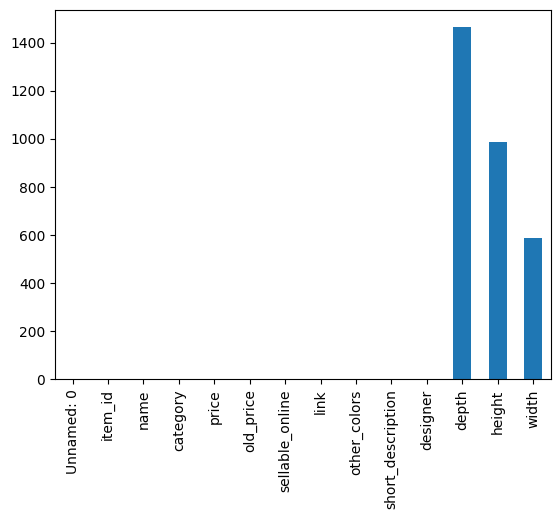

In [33]:
df.isna().sum().plot(kind="bar")

In [34]:
df = df.loc[:,~df.columns.isin(["depth","height","width","Unnamed: 0"])]

In [35]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen


### 3.2. Number of unique values for each column classified as object

In [36]:
df.select_dtypes('object').columns.to_list()

['name',
 'category',
 'old_price',
 'link',
 'other_colors',
 'short_description',
 'designer']

In [37]:
for i in df.select_dtypes('object').columns.to_list():
    print(f'unique categories of {i}: {df[i].nunique()}')

unique categories of name: 607
unique categories of category: 17
unique categories of old_price: 365
unique categories of link: 2962
unique categories of other_colors: 2
unique categories of short_description: 1706
unique categories of designer: 381


### 3.3. Calculating mean, median and standard deviation for price
#### Price variable exhibits right skewed distribution indicated by both descriptive statistics and the density plot

In [38]:
print(f"""mean = {round(np.mean(df['price']),2)}""")
print(f"""median = {round(np.median(df['price']),2)}""")
print(f"""std_dev = {round(statistics.stdev(df['price']),2)}""")

mean = 1078.21
median = 544.7
std_dev = 1374.65


In [39]:
for k in df.select_dtypes(['float64','int64']):
    print(f'mean {k}: {np.mean(df[k])}', 
          f'median {k}: {np.median(df[k])}')

mean item_id: 48632396.78992961 median item_id: 49288078.0
mean price: 1078.208419057932 median price: 544.7


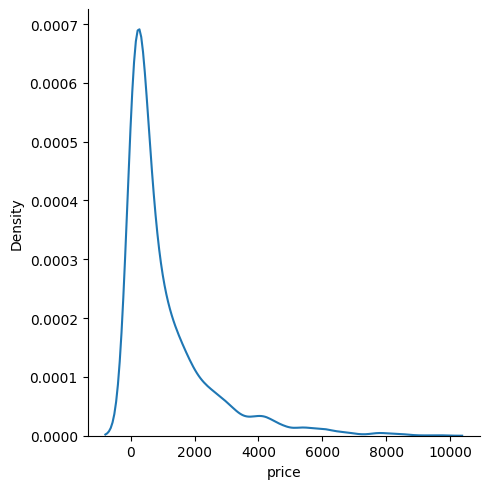

In [40]:
sns.displot(data=df,
             x = 'price',
             kind='kde')
plt.show()

### 3.4. Price by furniture category

#### Since the distribution is highly (right) skewed, median was calculated instead of mean

In [41]:
df.groupby(['category'])['price'].median().round(2).reset_index(name="mean_price_per_category").sort_values('mean_price_per_category',ascending=False) 

,category,mean_price_per_category
16,Wardrobes,1870.0
12,Sofas & armchairs,1268.5
1,Beds,1093.5
11,"Sideboards, buffets & console tables",965.0
10,Room dividers,725.0
14,Tables & desks,595.0
6,Chests of drawers & drawer units,460.0
15,Trolleys,447.5
0,Bar furniture,445.0
5,Chairs,425.0


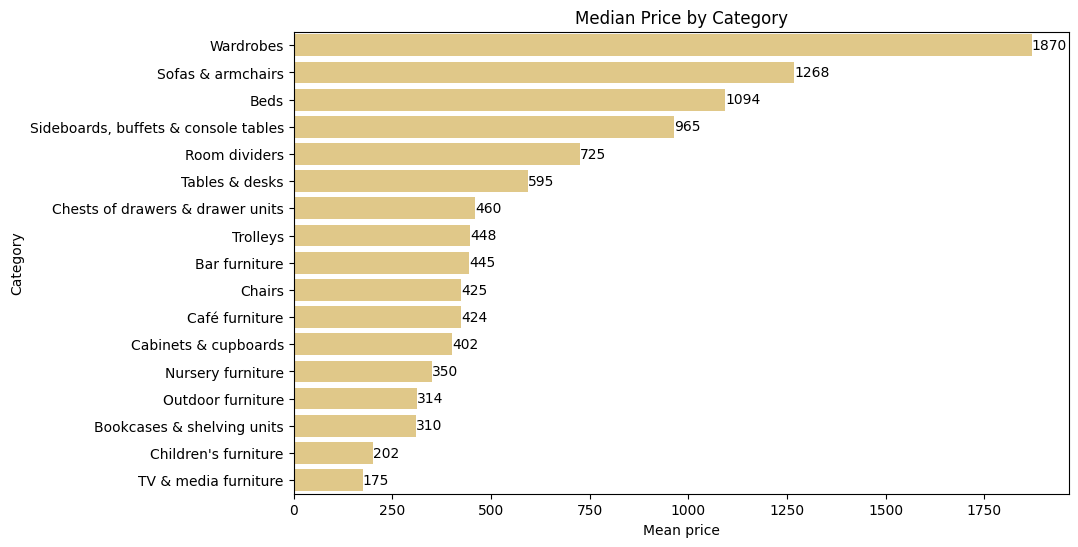

In [42]:
plt.figure(figsize=(10,6))
bar = sns.barplot(
    data = df.groupby(['category'])['price'].median().round(2).reset_index(name="mean_price_per_category").sort_values('mean_price_per_category',ascending=False),
    y = 'category',
    x = 'mean_price_per_category',
    color = "#EECE7B"
            )
plt.bar_label(bar.containers[0], label_type='edge',labels=[f'{x:.0f}' for x in bar.containers[0].datavalues])
plt.xlabel('Mean price')
plt.ylabel('Category')
plt.title('Median Price by Category')
plt.show()

### 3.5. The most popular furniture categories

In [43]:
df_category_freq = df['category'].value_counts().reset_index(name='frequency')

In [44]:
df_category_freq['percentage_all_observations'] = df_category_freq['frequency']/df.shape[0]

In [45]:
df_category_freq

,index,frequency,percentage_all_observations
0,Tables & desks,612,0.165674
1,Bookcases & shelving units,548,0.148349
2,Chairs,481,0.130211
3,Sofas & armchairs,428,0.115864
4,Cabinets & cupboards,292,0.079047
5,Wardrobes,236,0.063887
6,Outdoor furniture,216,0.058473
7,Beds,208,0.056308
8,TV & media furniture,190,0.051435
9,Chests of drawers & drawer units,125,0.033839


#### First 4 categories (Tables & desks, Bookcases & shelving units, Chairs, Sofas & armchairs) occupy 56% of all observations among furniture categories in the data set

In [46]:
df_category_freq['percentage_all_observations'][0:4].sum()

0.5600974553329724

Text(0, 0.5, 'Frequency')

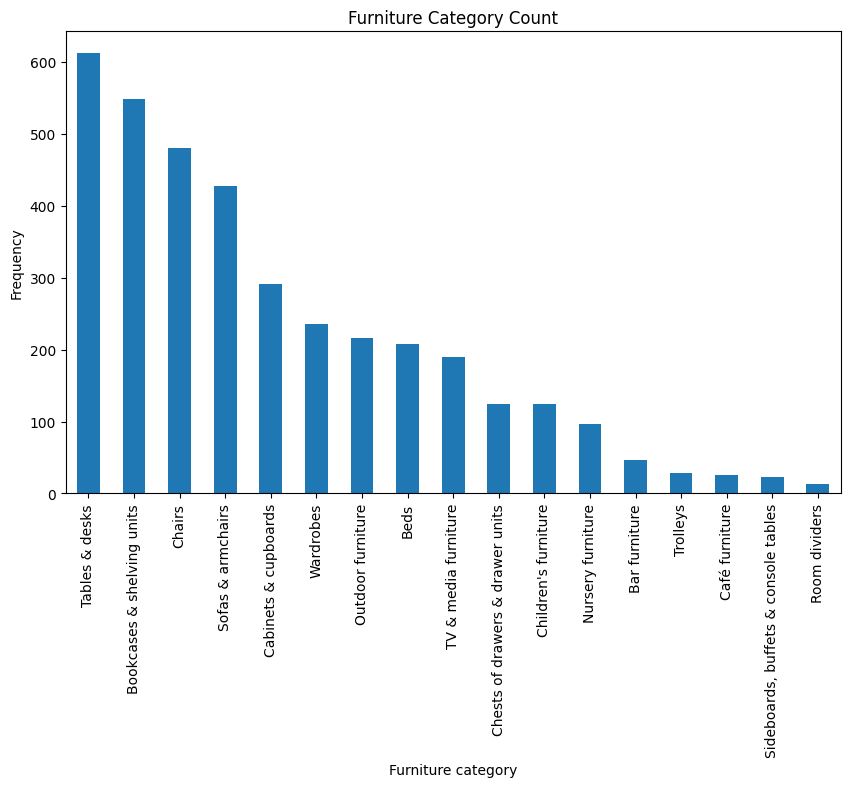

In [47]:
plt.figure(figsize=(10,6))
df['category'].value_counts().plot(kind="bar")
plt.title('Furniture Category Count')
plt.xlabel('Furniture category')
plt.ylabel('Frequency')

### 3.6. 10 most frequent designers

In [48]:
df['designer'].value_counts().sort_values(ascending=False).head(10).reset_index()

,index,designer
0,IKEA of Sweden,828
1,Ehlén Johansson,161
2,Francis Cayouette,151
3,Ola Wihlborg,134
4,K Hagberg/M Hagberg,122
5,Jon Karlsson,120
6,Carina Bengs,75
7,Ehlén Johansson/IKEA of Sweden,75
8,Henrik Preutz,70
9,IKEA of Sweden/Ehlén Johansson,70


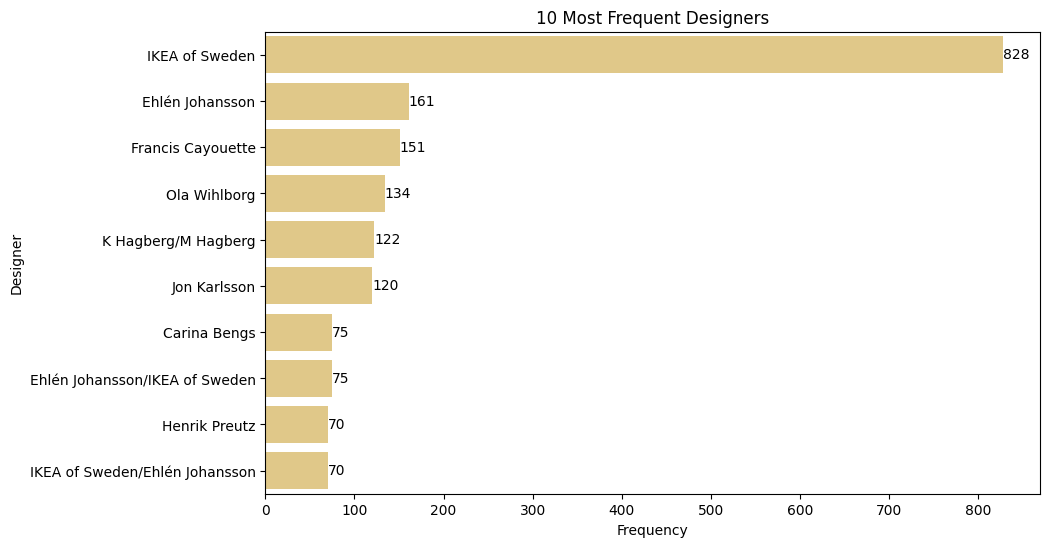

In [49]:
plt.figure(figsize=(10,6))
bar = sns.barplot(data = df['designer'].value_counts().sort_values(ascending=False).head(10).reset_index(),
            y = 'index',
            x = 'designer',
            color = '#EECE7B')
plt.bar_label(bar.containers[0])
plt.title('10 Most Frequent Designers')
plt.xlabel('Frequency')
plt.ylabel('Designer')
plt.show()

#### IKEA of Sweden occupies 22% of all furnitures in the data set

In [50]:
df[df['designer'] == 'IKEA of Sweden'].shape[0]

828

In [51]:
round(df[df['designer'] == 'IKEA of Sweden'].shape[0]/df.shape[0],2)

0.22

#### Only 28 products in the data set are not sellable online

In [52]:
df['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64